In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
pd.set_option('display.max_rows', 50)
plt.rc('font',family='Microsoft YaHei')
chain_data_line_1 = pd.read_csv('Data/chain_data_line_1.csv',parse_dates=['上车时间', '下车时间'], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S'))
chain_data_line_1.sort_values(by='上车时间')

C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_2744\1583710055.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  chain_data_line_1 = pd.read_csv('Data/chain_data_line_1.csv',parse_dates=['上车时间', '下车时间'], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S'))


,日期编号,订单编号,上车站序,上车站点名称,上车时间,下车站序,下车站点名称,下车时间
622,1,623,1,AB,2019-10-02 05:59:01,14,AO,2019-10-02 06:28:24
911,1,912,1,AB,2019-10-02 06:00:01,33,BH,2019-10-02 06:57:57
889,1,890,2,AC,2019-10-02 06:00:01,33,BH,2019-10-02 06:57:49
620,1,621,2,AC,2019-10-02 06:03:01,20,AU,2019-10-02 06:34:06
1665,1,1666,2,AC,2019-10-02 06:03:01,32,BG,2019-10-02 06:55:24
...,...,...,...,...,...,...,...,...
8826,3,8827,12,AM,2019-10-19 21:15:01,20,AU,2019-10-19 21:27:43
6974,3,6975,12,AM,2019-10-19 21:15:01,20,AU,2019-10-19 21:27:31
7674,3,7675,44,BS,2019-10-19 21:21:01,47,BV,2019-10-19 21:26:47
8857,3,8858,36,BK,2019-10-19 21:21:01,43,BR,2019-10-19 21:35:36


In [2]:
# temp = chain_data_line_1[(chain_data_line_1['上车站序']== 1) & (chain_data_line_1['日期编号']==1)].sort_values(by='上车时间')
temp = chain_data_line_1[chain_data_line_1['日期编号']==1].sort_values(by='上车时间')
temp['上车间隔时间'] = temp['上车时间'].diff()
temp['上车间隔时间'] = temp['上车间隔时间'].dt.total_seconds()/60
# temp = chain_data_line_1[chain_data_line_1['日期编号']==1].sort_values(by='上车时间')
# temp['上车时间'] = temp['上车时间'].dt.time
# temp['下车时间'] = temp['下车时间'].dt.time
# base_time = pd.to_datetime('5:55:00').time()
# temp['上车时间'] = (temp['上车时间'].apply(lambda x: pd.to_timedelta(str(x))) - pd.to_timedelta(str(base_time))).dt.total_seconds().astype(int)
# temp['下车时间'] = (temp['下车时间'].apply(lambda x: pd.to_timedelta(str(x))) - pd.to_timedelta(str(base_time))).dt.total_seconds().astype(int)
# temp.to_csv('Data/passenger_info_line1_day1.csv', index=False)
temp


,日期编号,订单编号,上车站序,上车站点名称,上车时间,下车站序,下车站点名称,下车时间,上车间隔时间
622,1,623,1,AB,2019-10-02 05:59:01,14,AO,2019-10-02 06:28:24,NaN
911,1,912,1,AB,2019-10-02 06:00:01,33,BH,2019-10-02 06:57:57,1.0
889,1,890,2,AC,2019-10-02 06:00:01,33,BH,2019-10-02 06:57:49,0.0
620,1,621,2,AC,2019-10-02 06:03:01,20,AU,2019-10-02 06:34:06,3.0
1746,1,1747,2,AC,2019-10-02 06:03:01,9,AJ,2019-10-02 06:17:28,0.0
...,...,...,...,...,...,...,...,...,...
1475,1,1476,18,AS,2019-10-02 21:18:01,31,BF,2019-10-02 21:36:44,0.0
300,1,301,20,AU,2019-10-02 21:21:01,31,BF,2019-10-02 21:36:28,3.0
328,1,329,43,BR,2019-10-02 21:49:01,48,BW,2019-10-02 21:57:08,28.0
436,1,437,43,BR,2019-10-02 21:49:01,48,BW,2019-10-02 21:57:25,0.0


C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_2744\1441003643.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['上车间隔时间'], kde=True,hist=True, kde_kws={"shade": True})
C:\Users\MECHREVO\DataspellProjects\Spell_24\venv\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


([<matplotlib.axis.XTick at 0x218eb5d5880>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

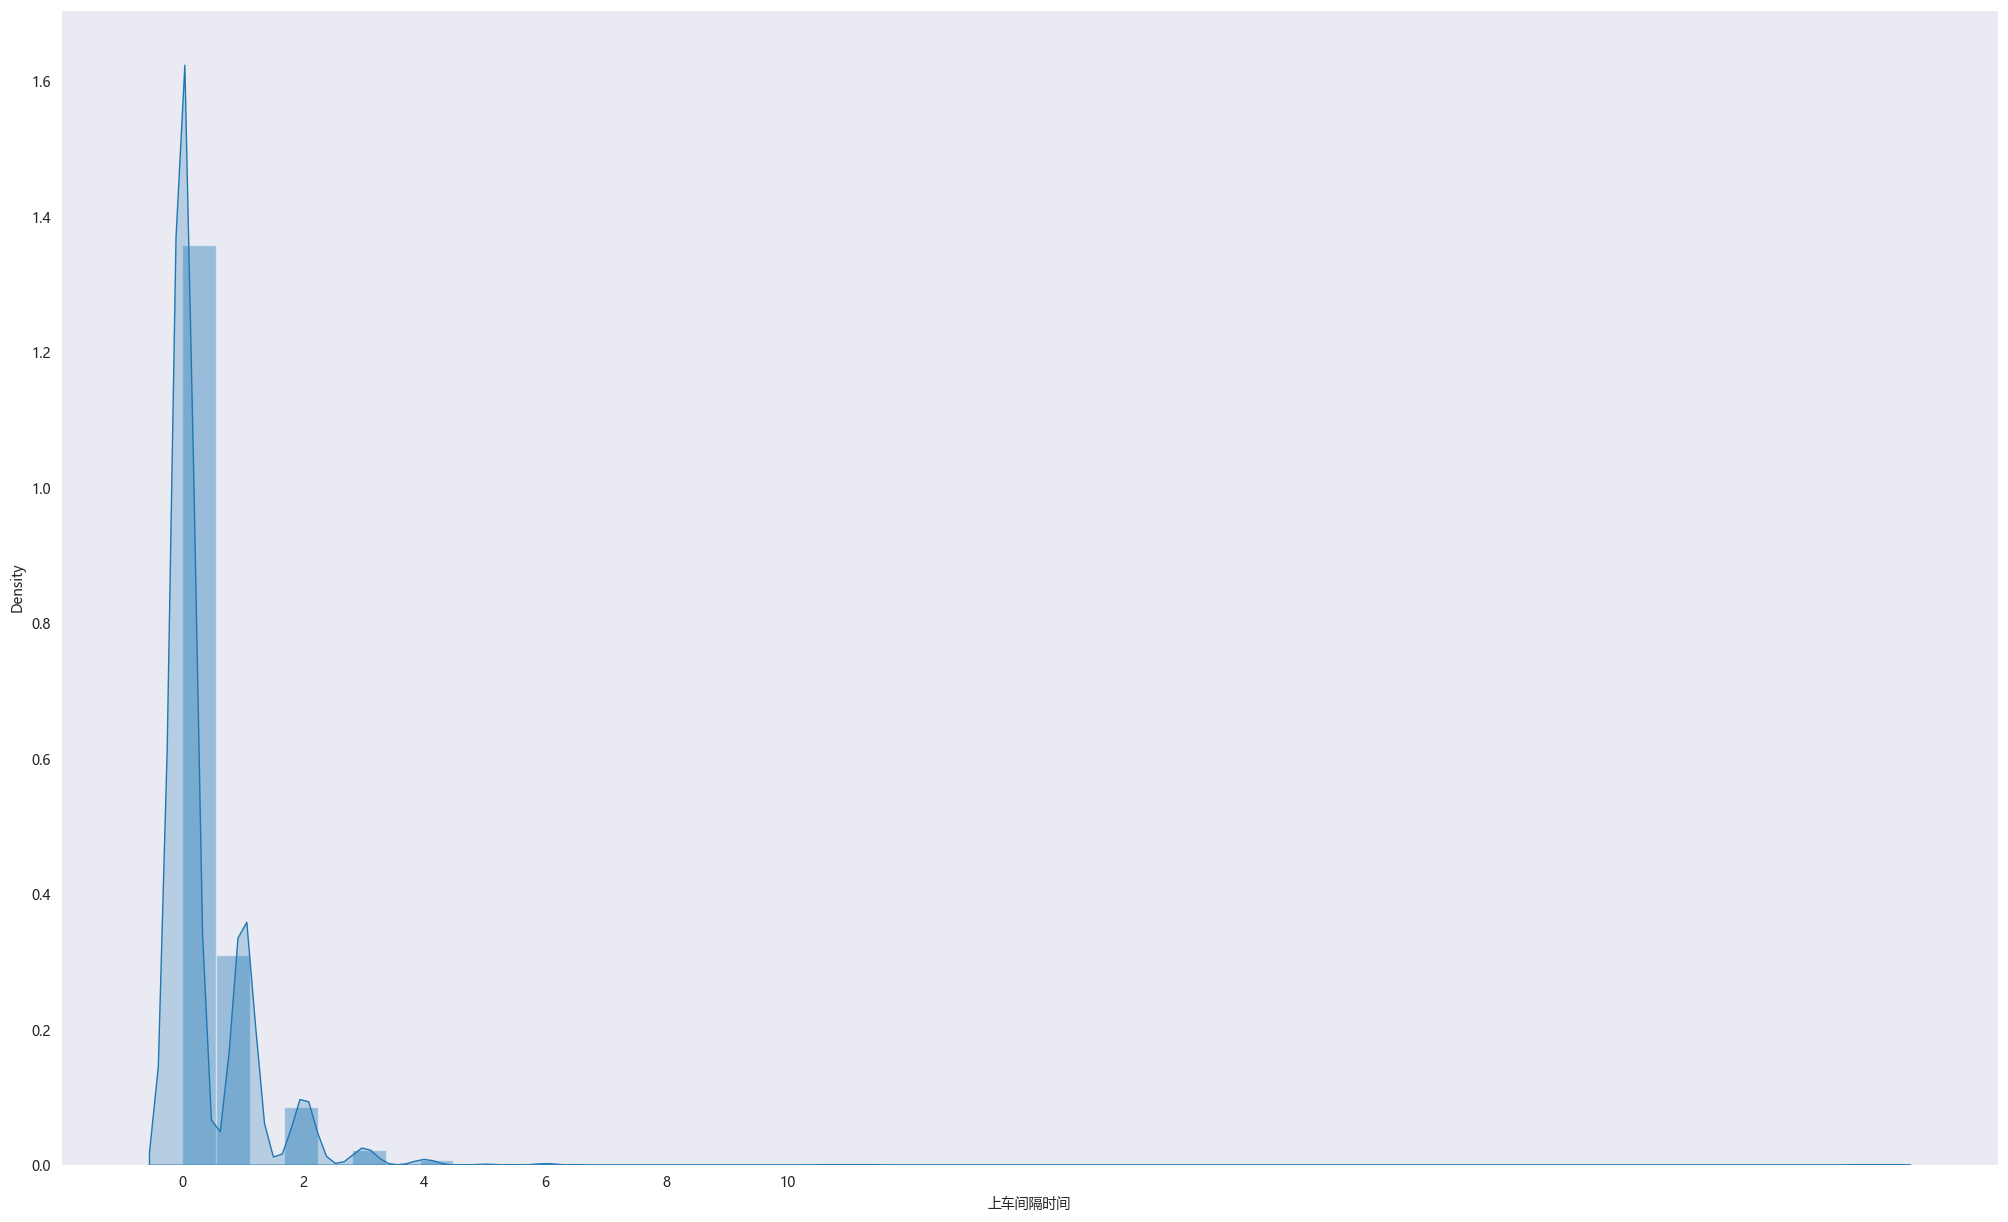

In [3]:
import numpy as np
plt.figure(figsize=(25, 15))
sns.distplot(temp['上车间隔时间'], kde=True,hist=True, kde_kws={"shade": True})
plt.grid(False)
xticks = np.linspace(0, 10, 6)  # 在0-10这个区间内生成20个等间距的标记
plt.xticks(xticks)

C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_2744\148543659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_series, kde=True, bins=20, hist=True, kde_kws={"shade": True})
C:\Users\MECHREVO\DataspellProjects\Spell_24\venv\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 1.0, '小于2.5的间隔时间')

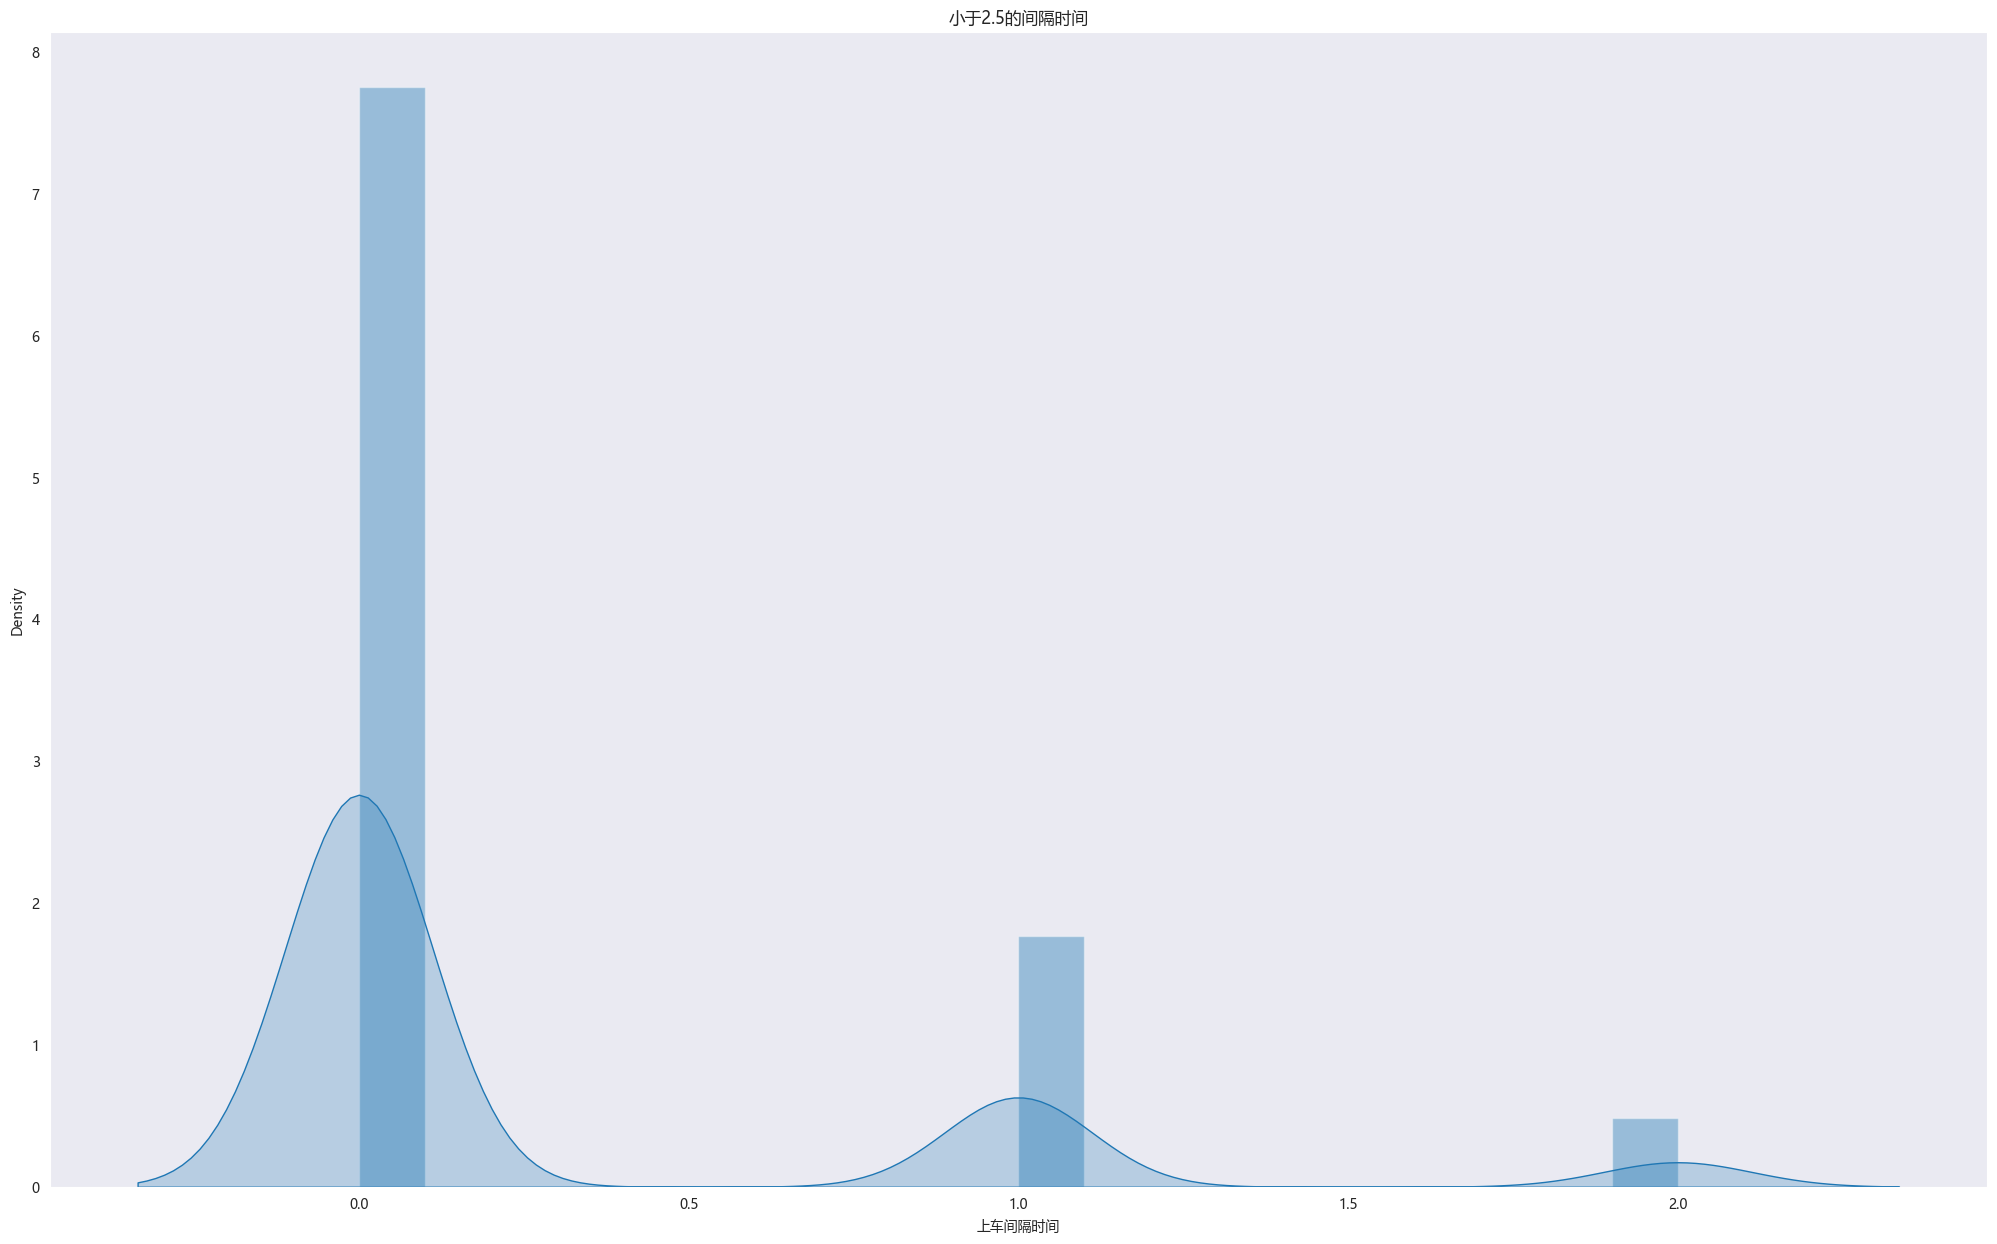

In [4]:
filtered_series = temp[temp['上车间隔时间']<2.5]['上车间隔时间']
plt.figure(figsize=(25, 15))
sns.distplot(filtered_series, kde=True, bins=20, hist=True, kde_kws={"shade": True})
plt.grid(False)
plt.title('小于2.5的间隔时间')

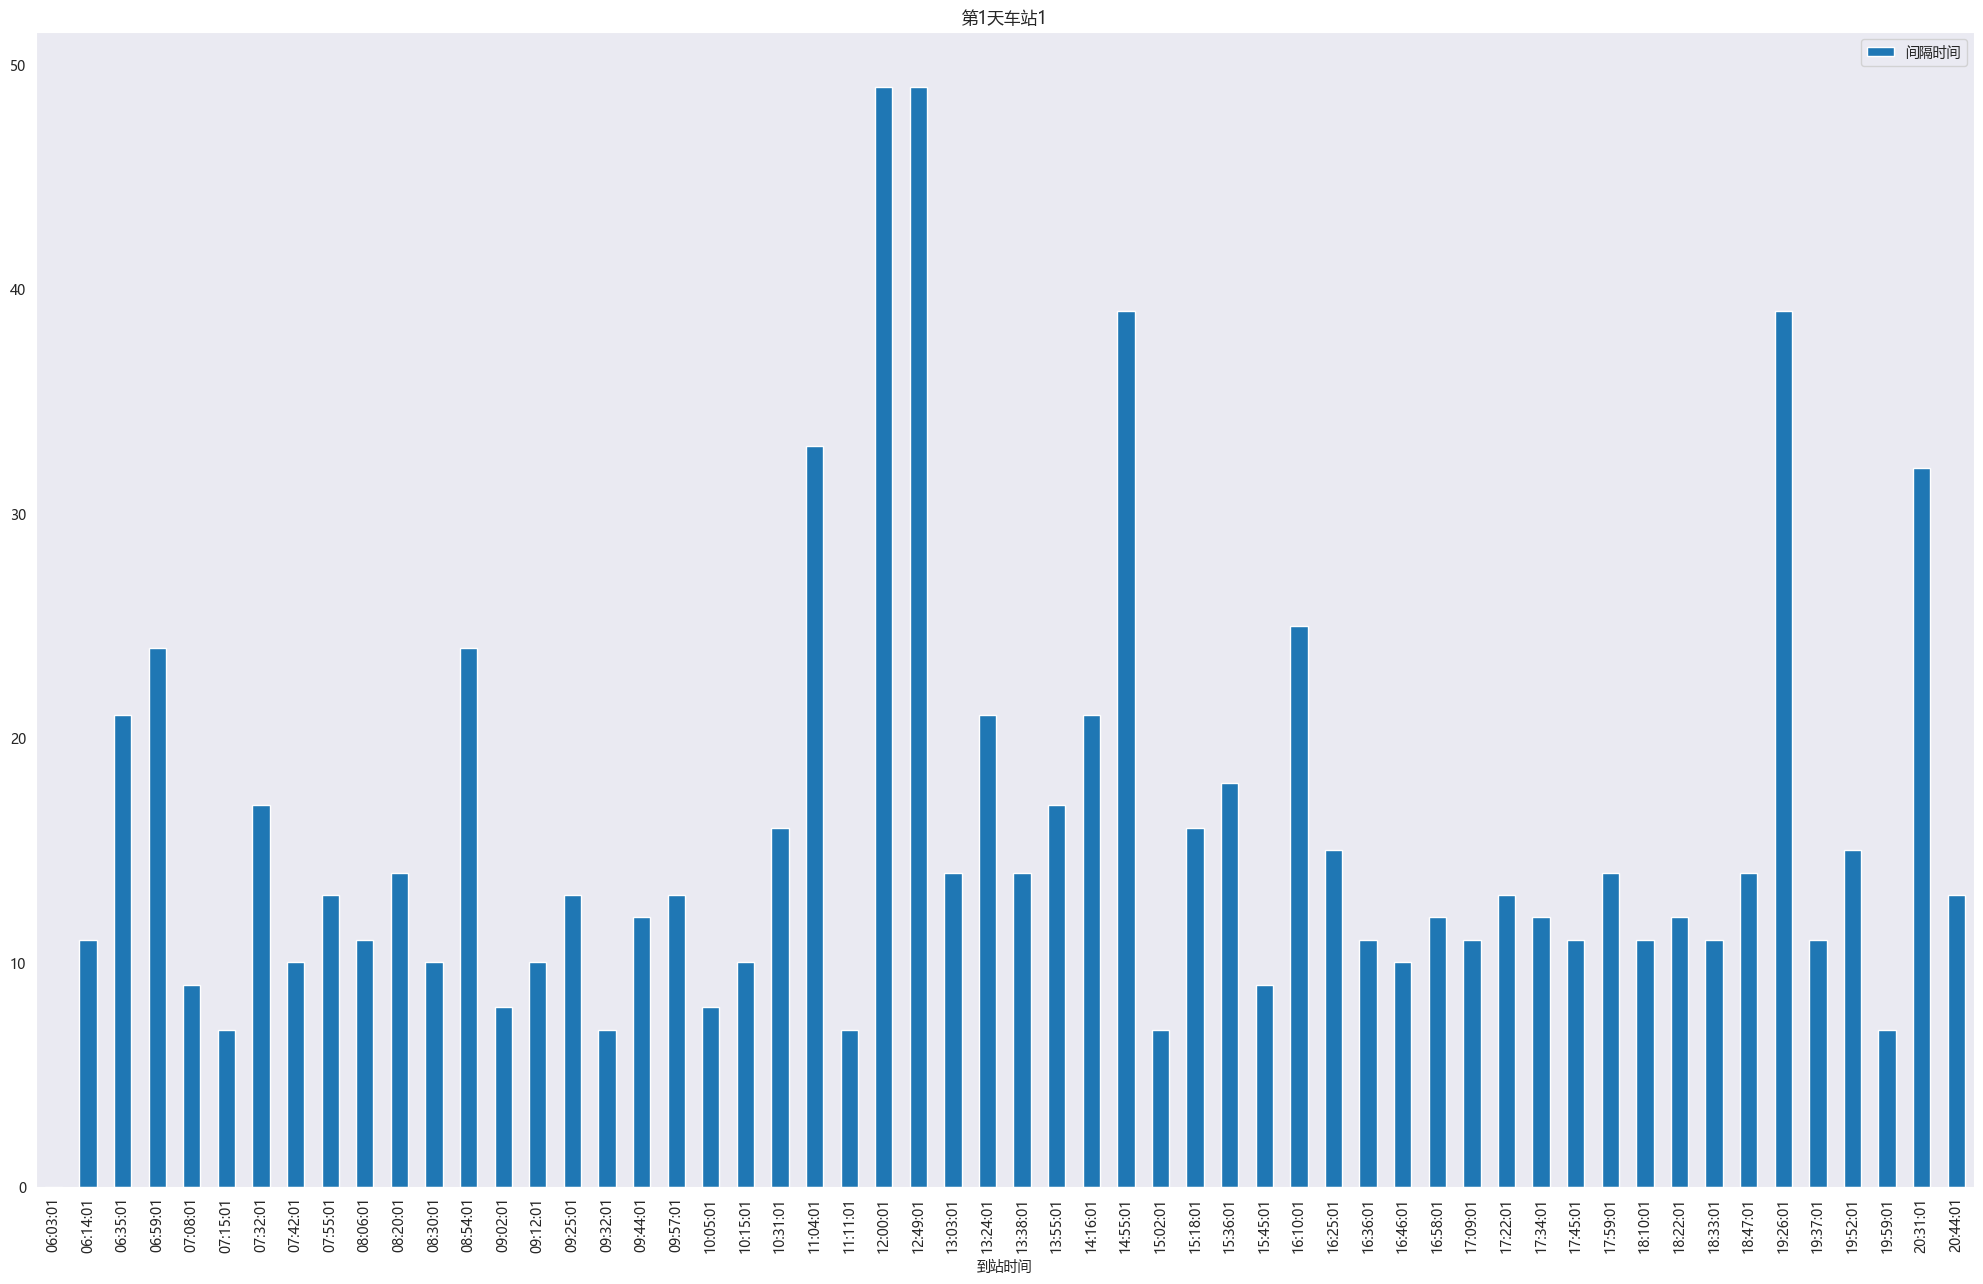

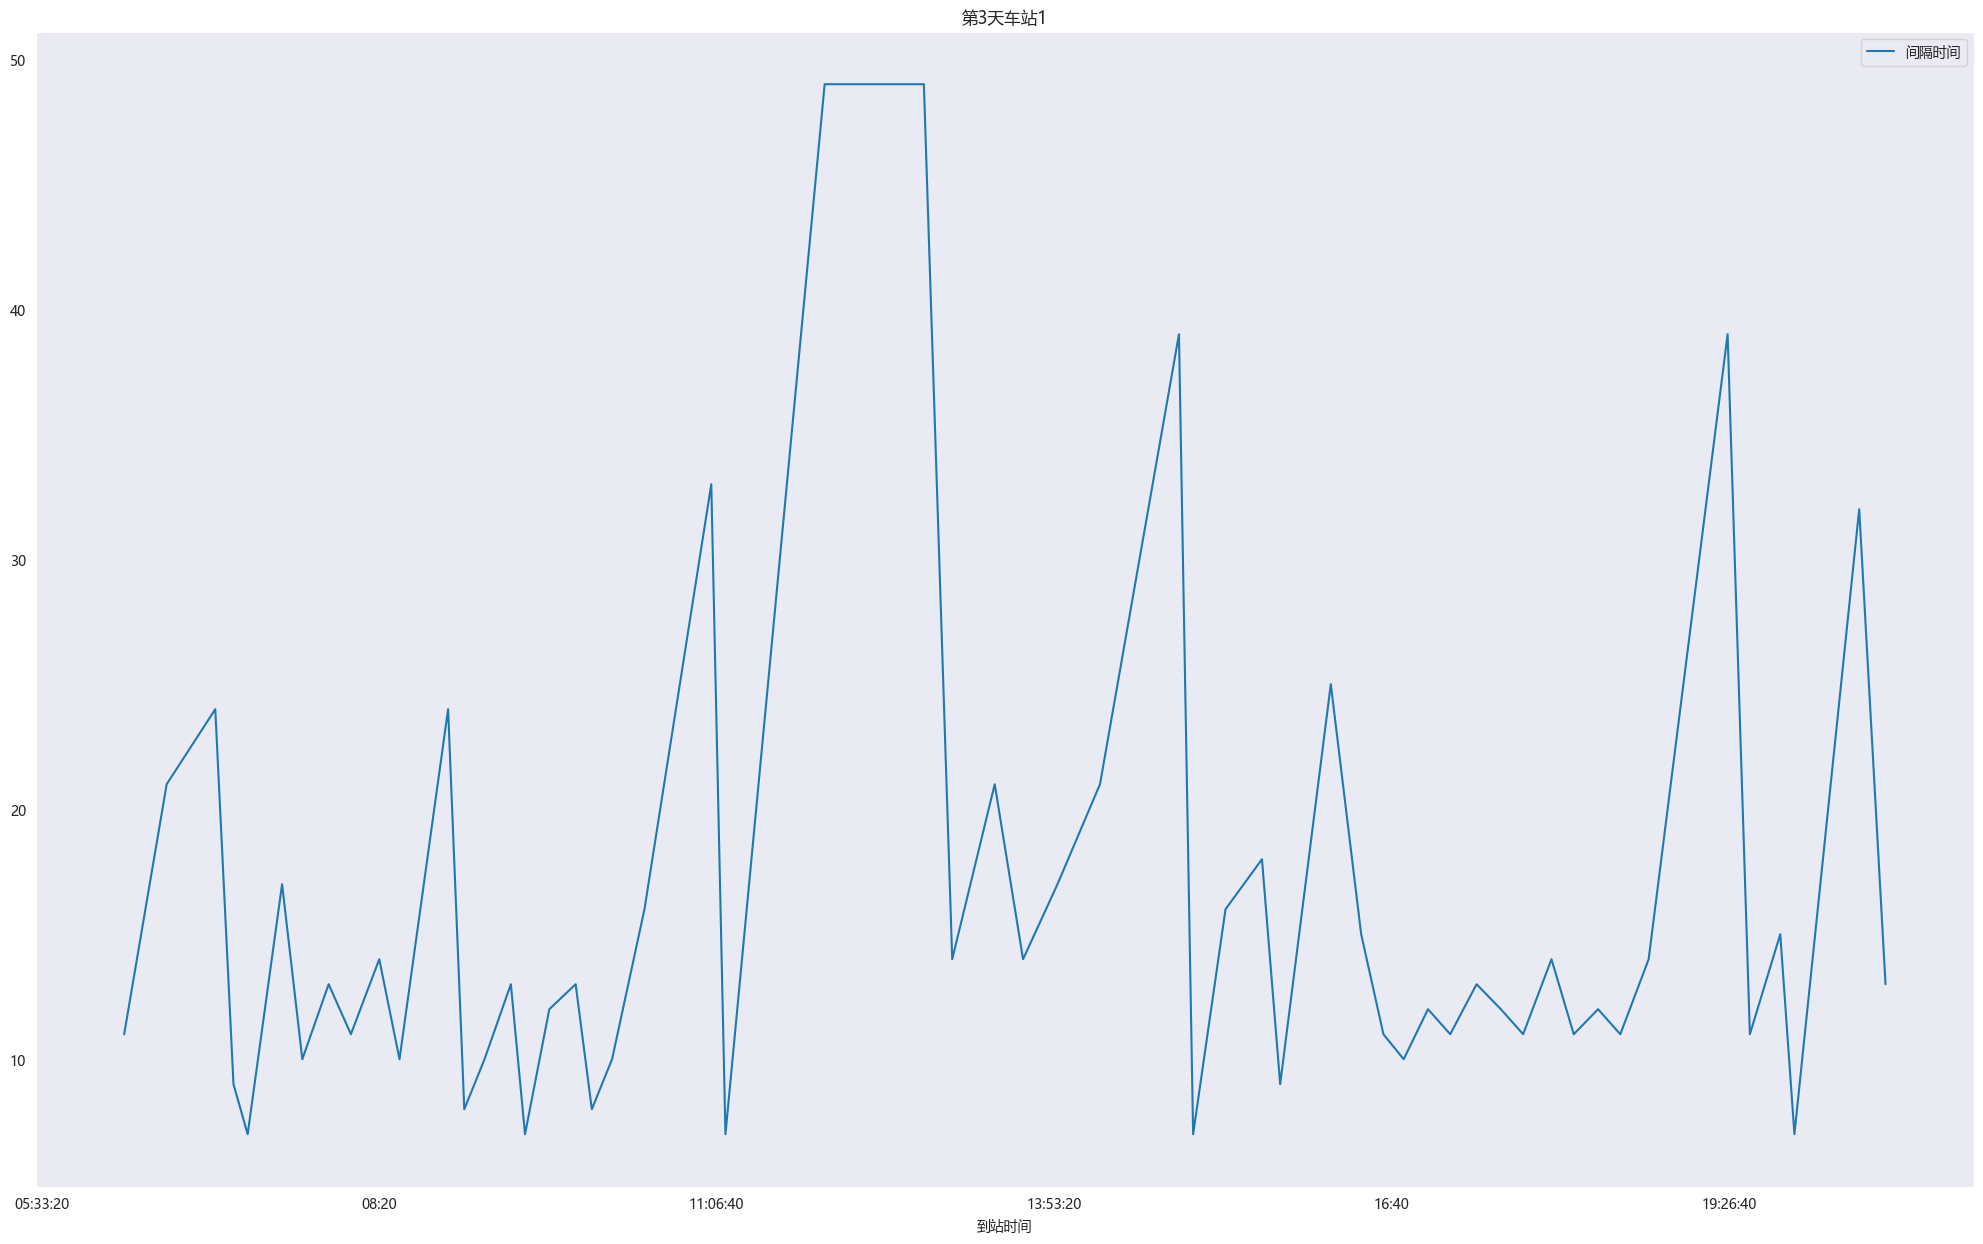

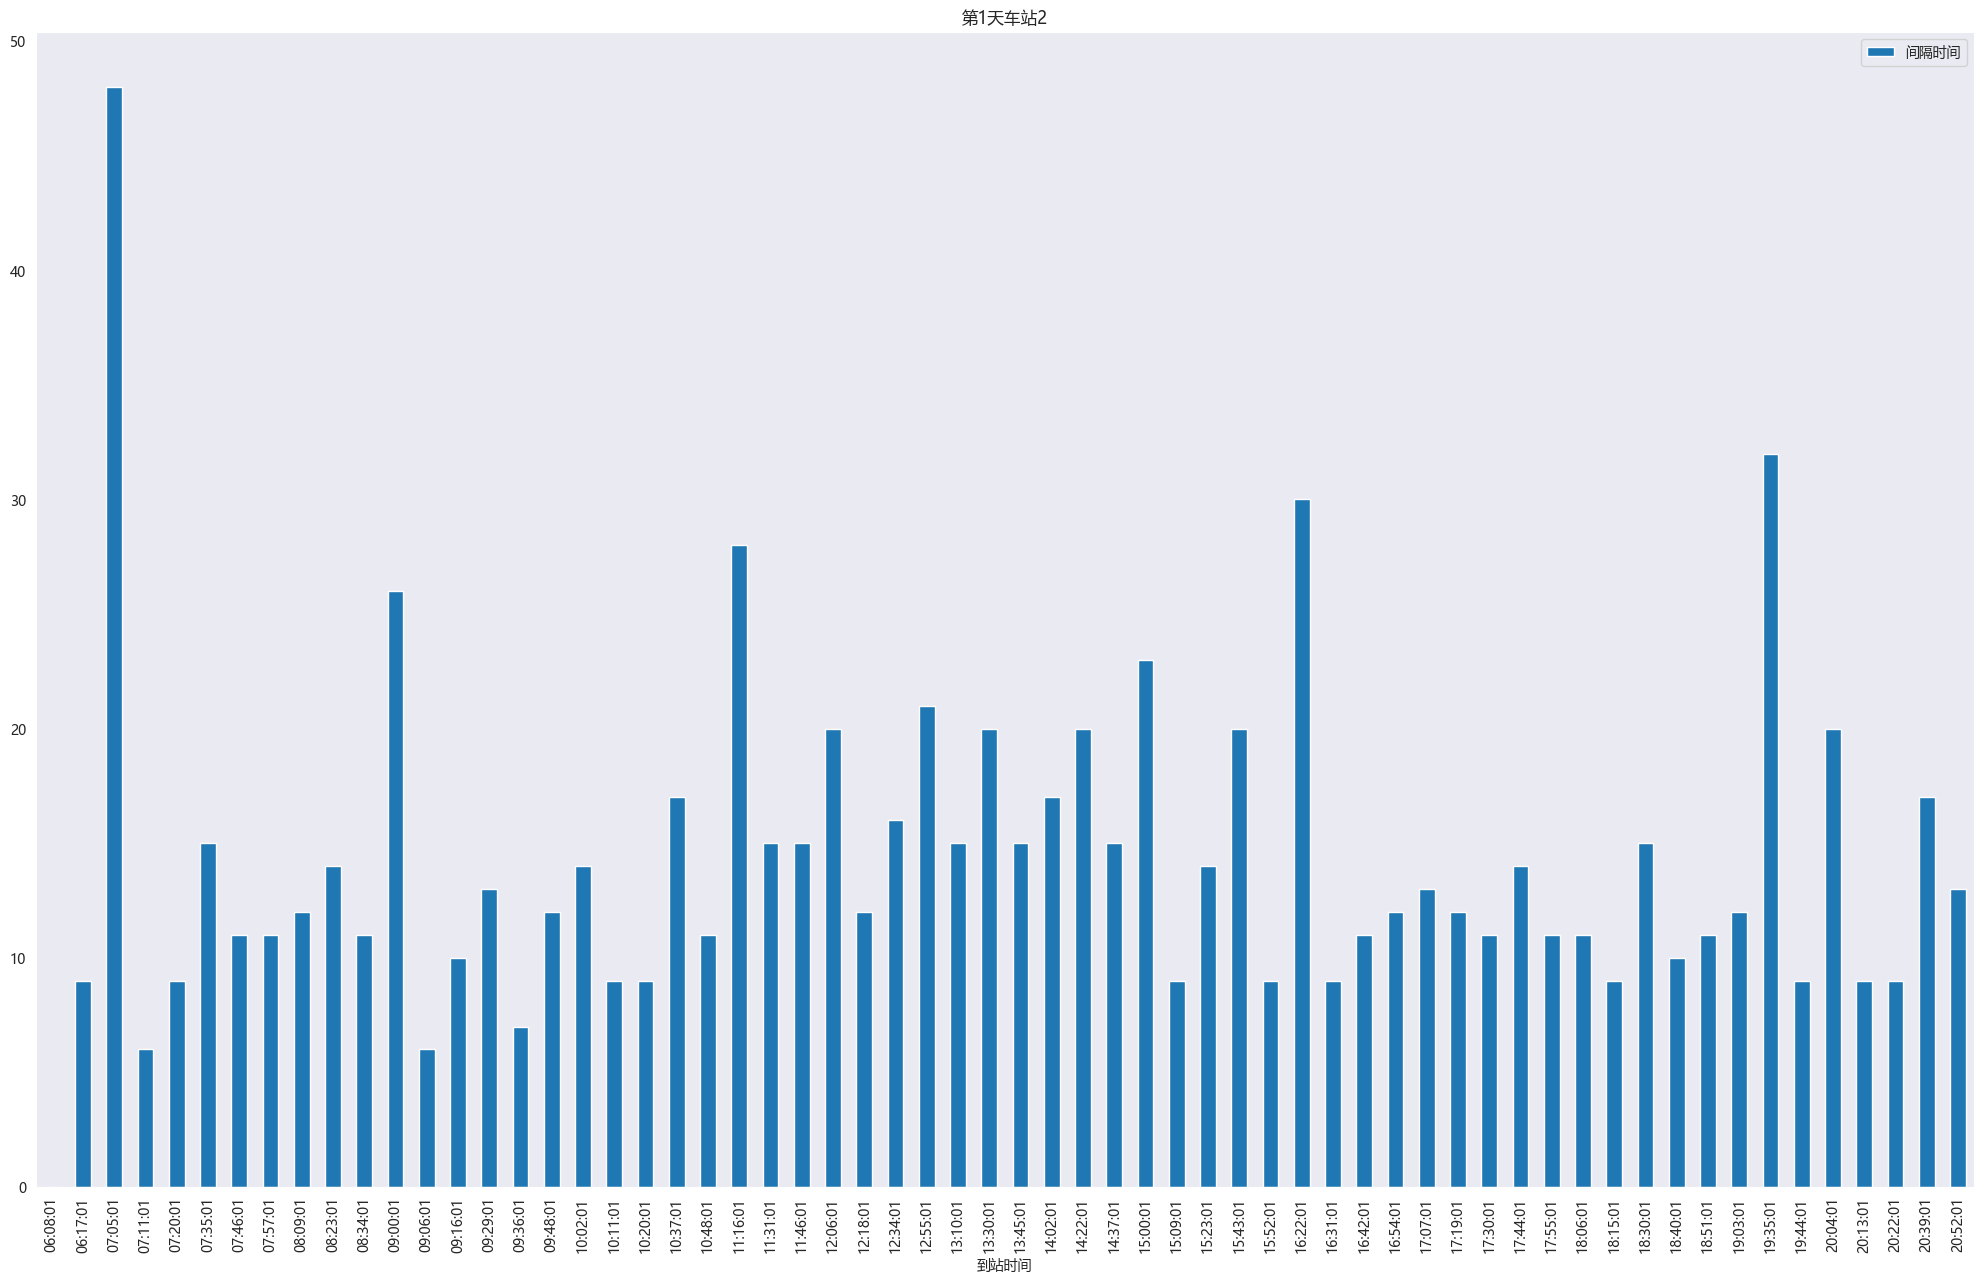

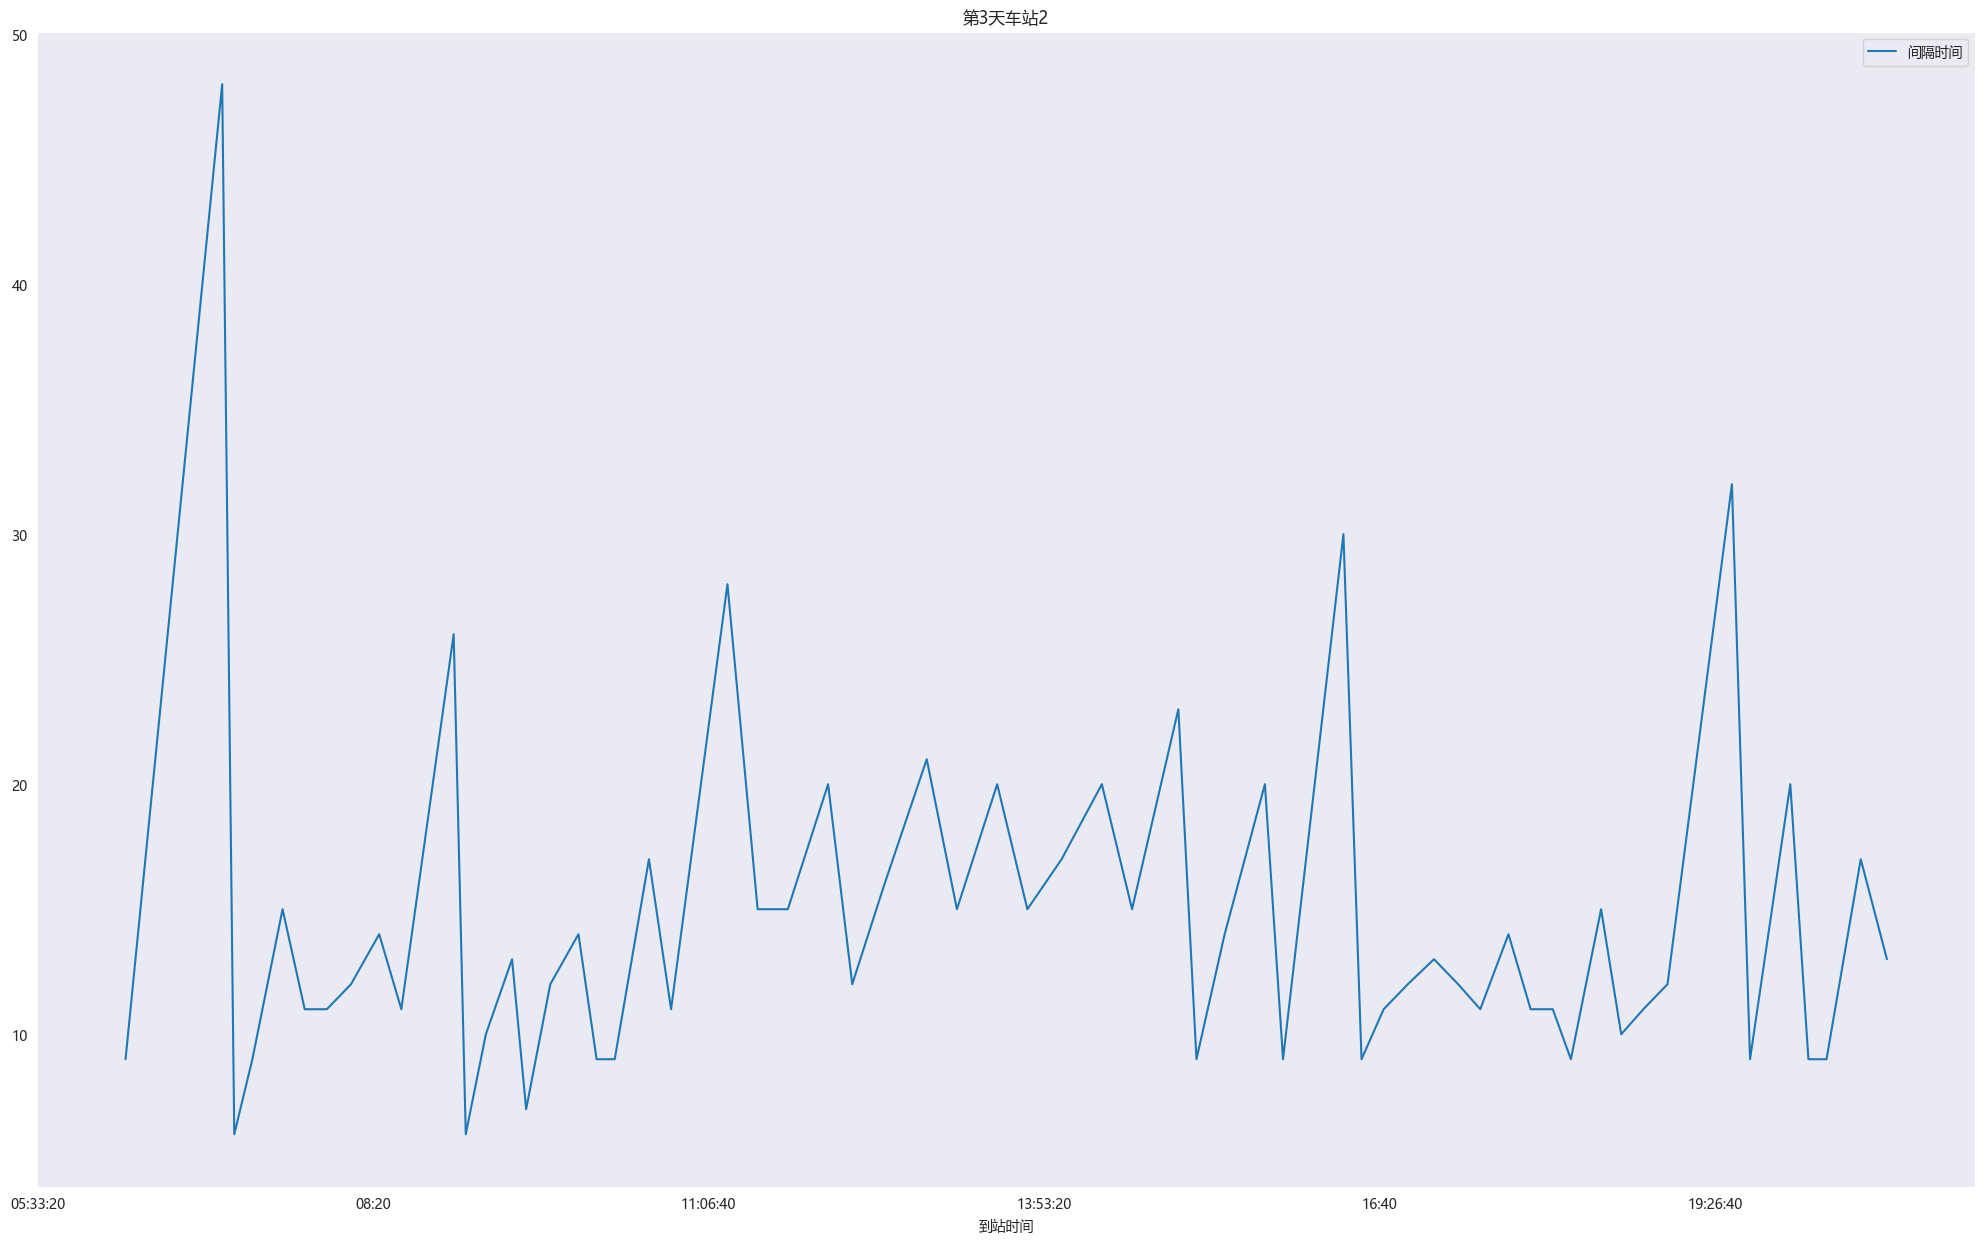

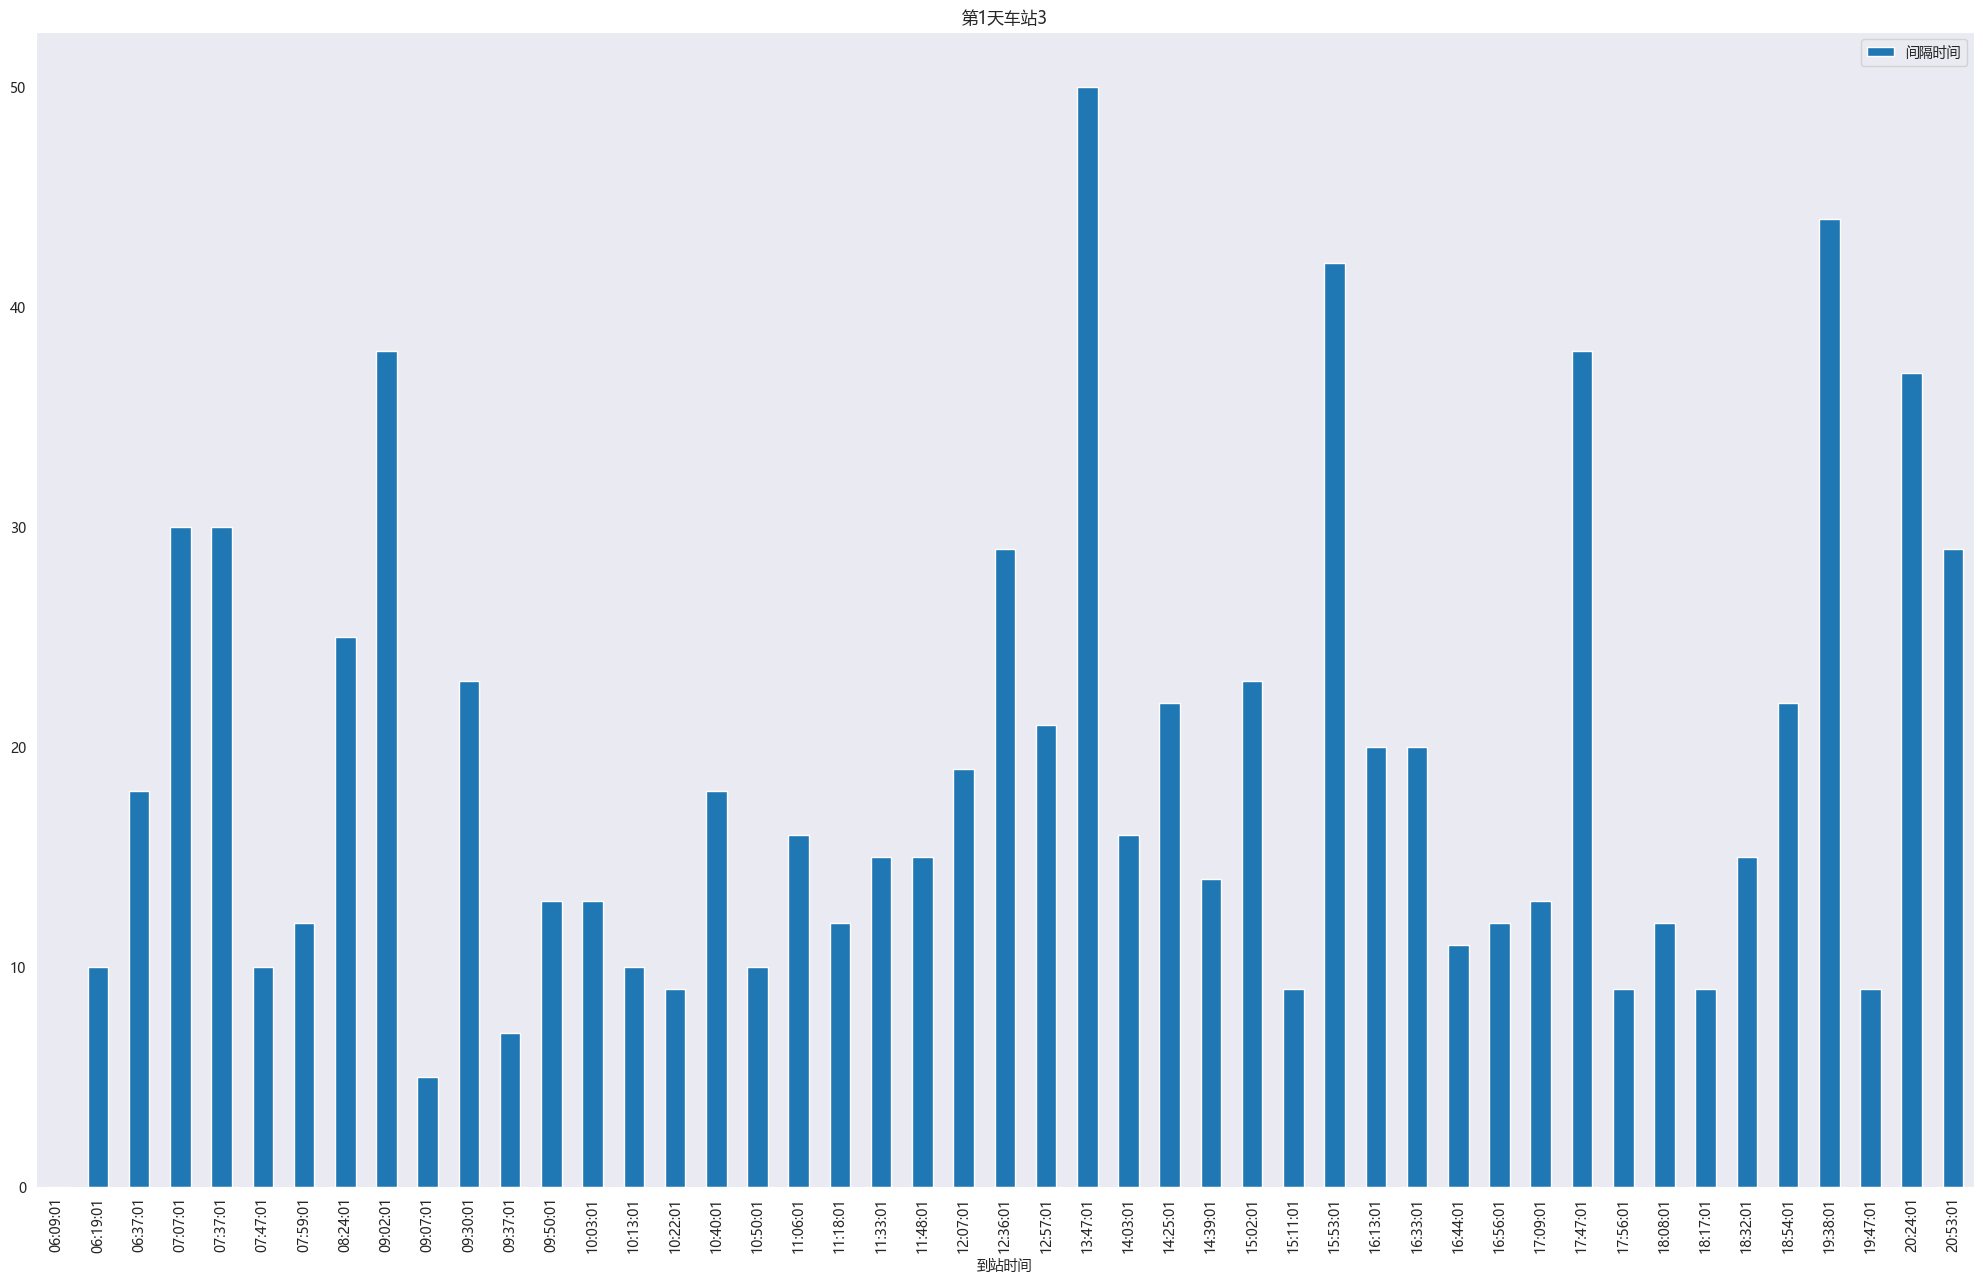

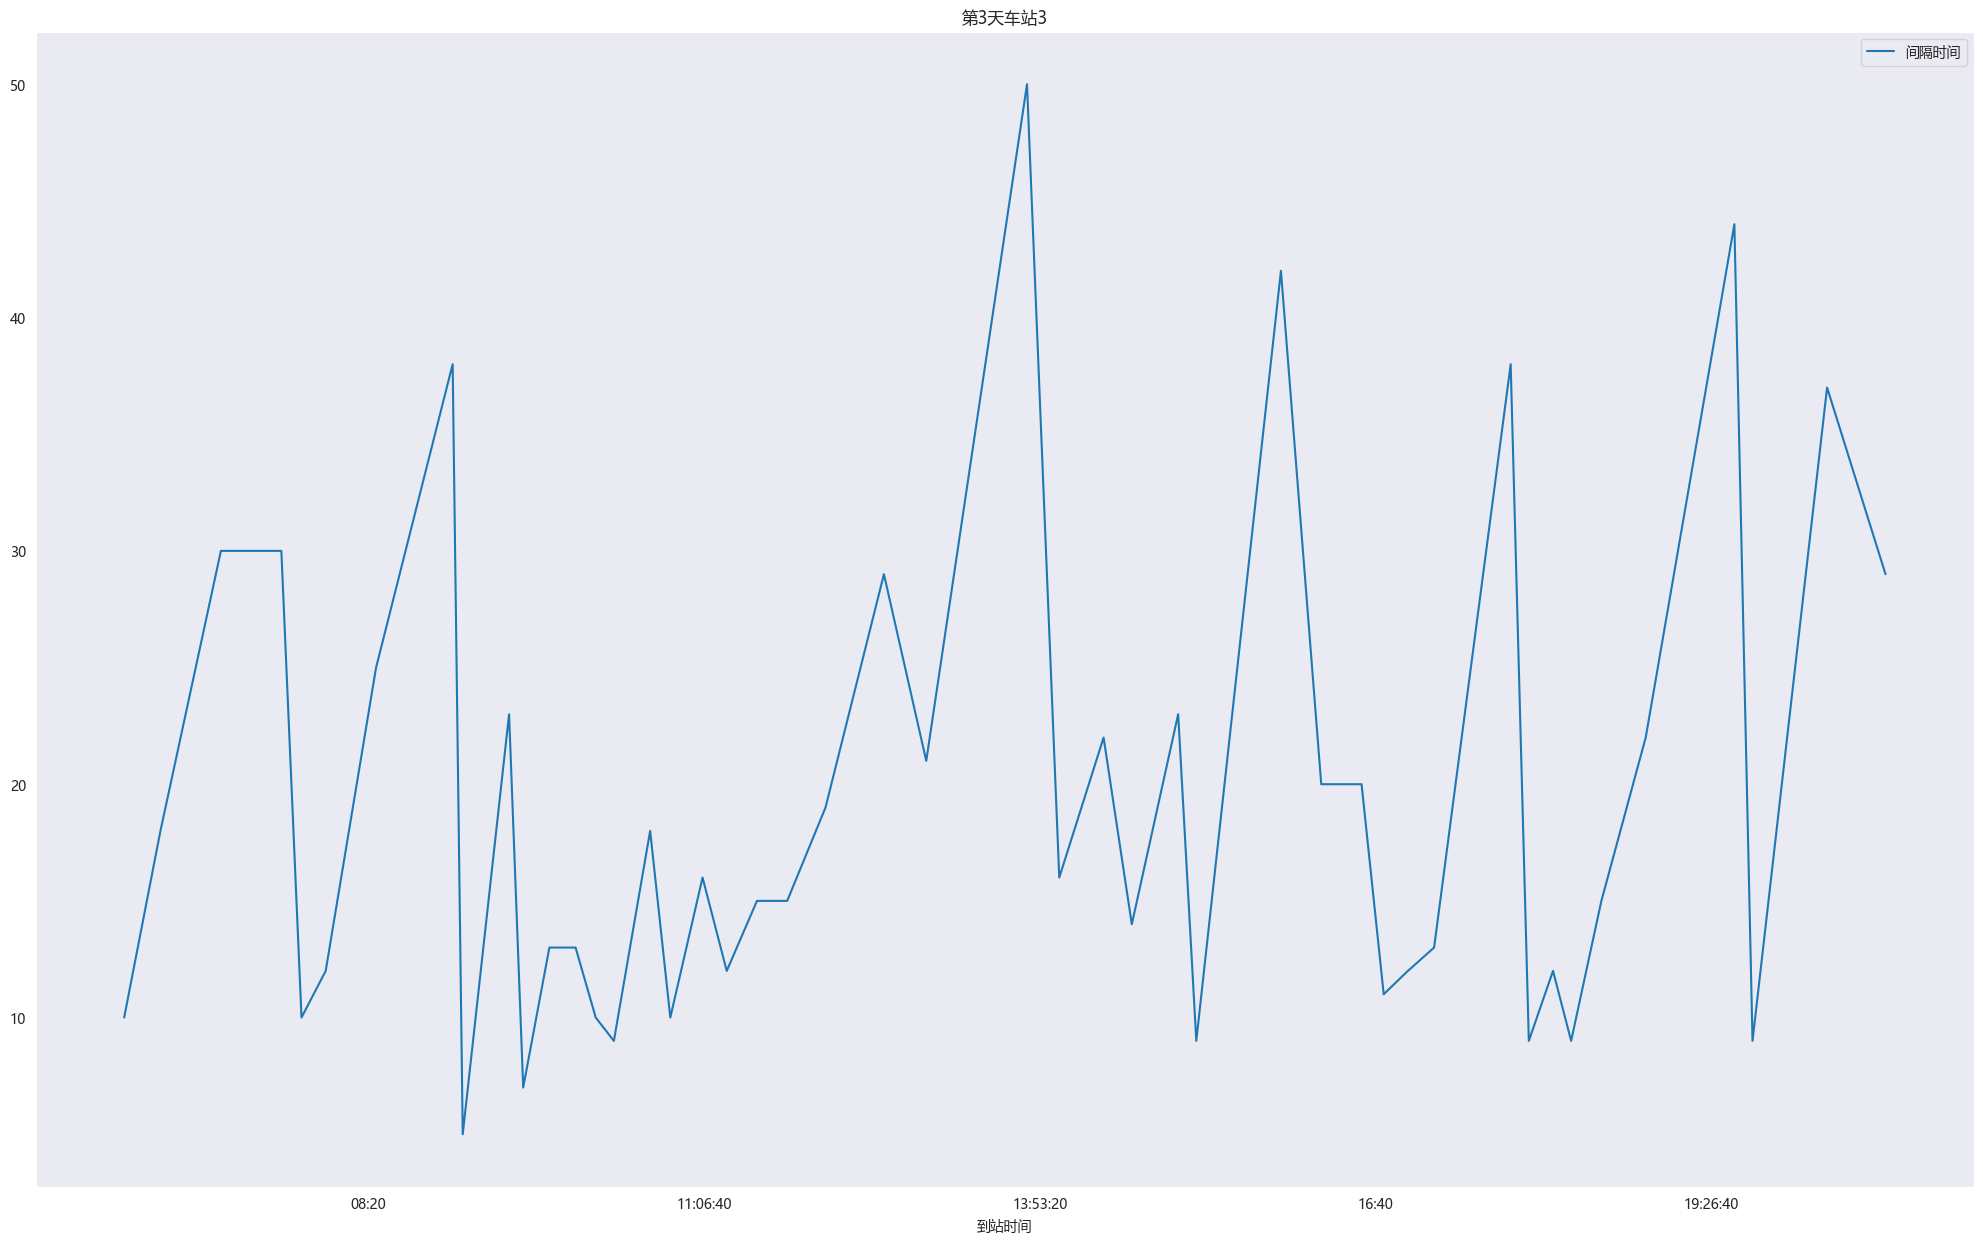

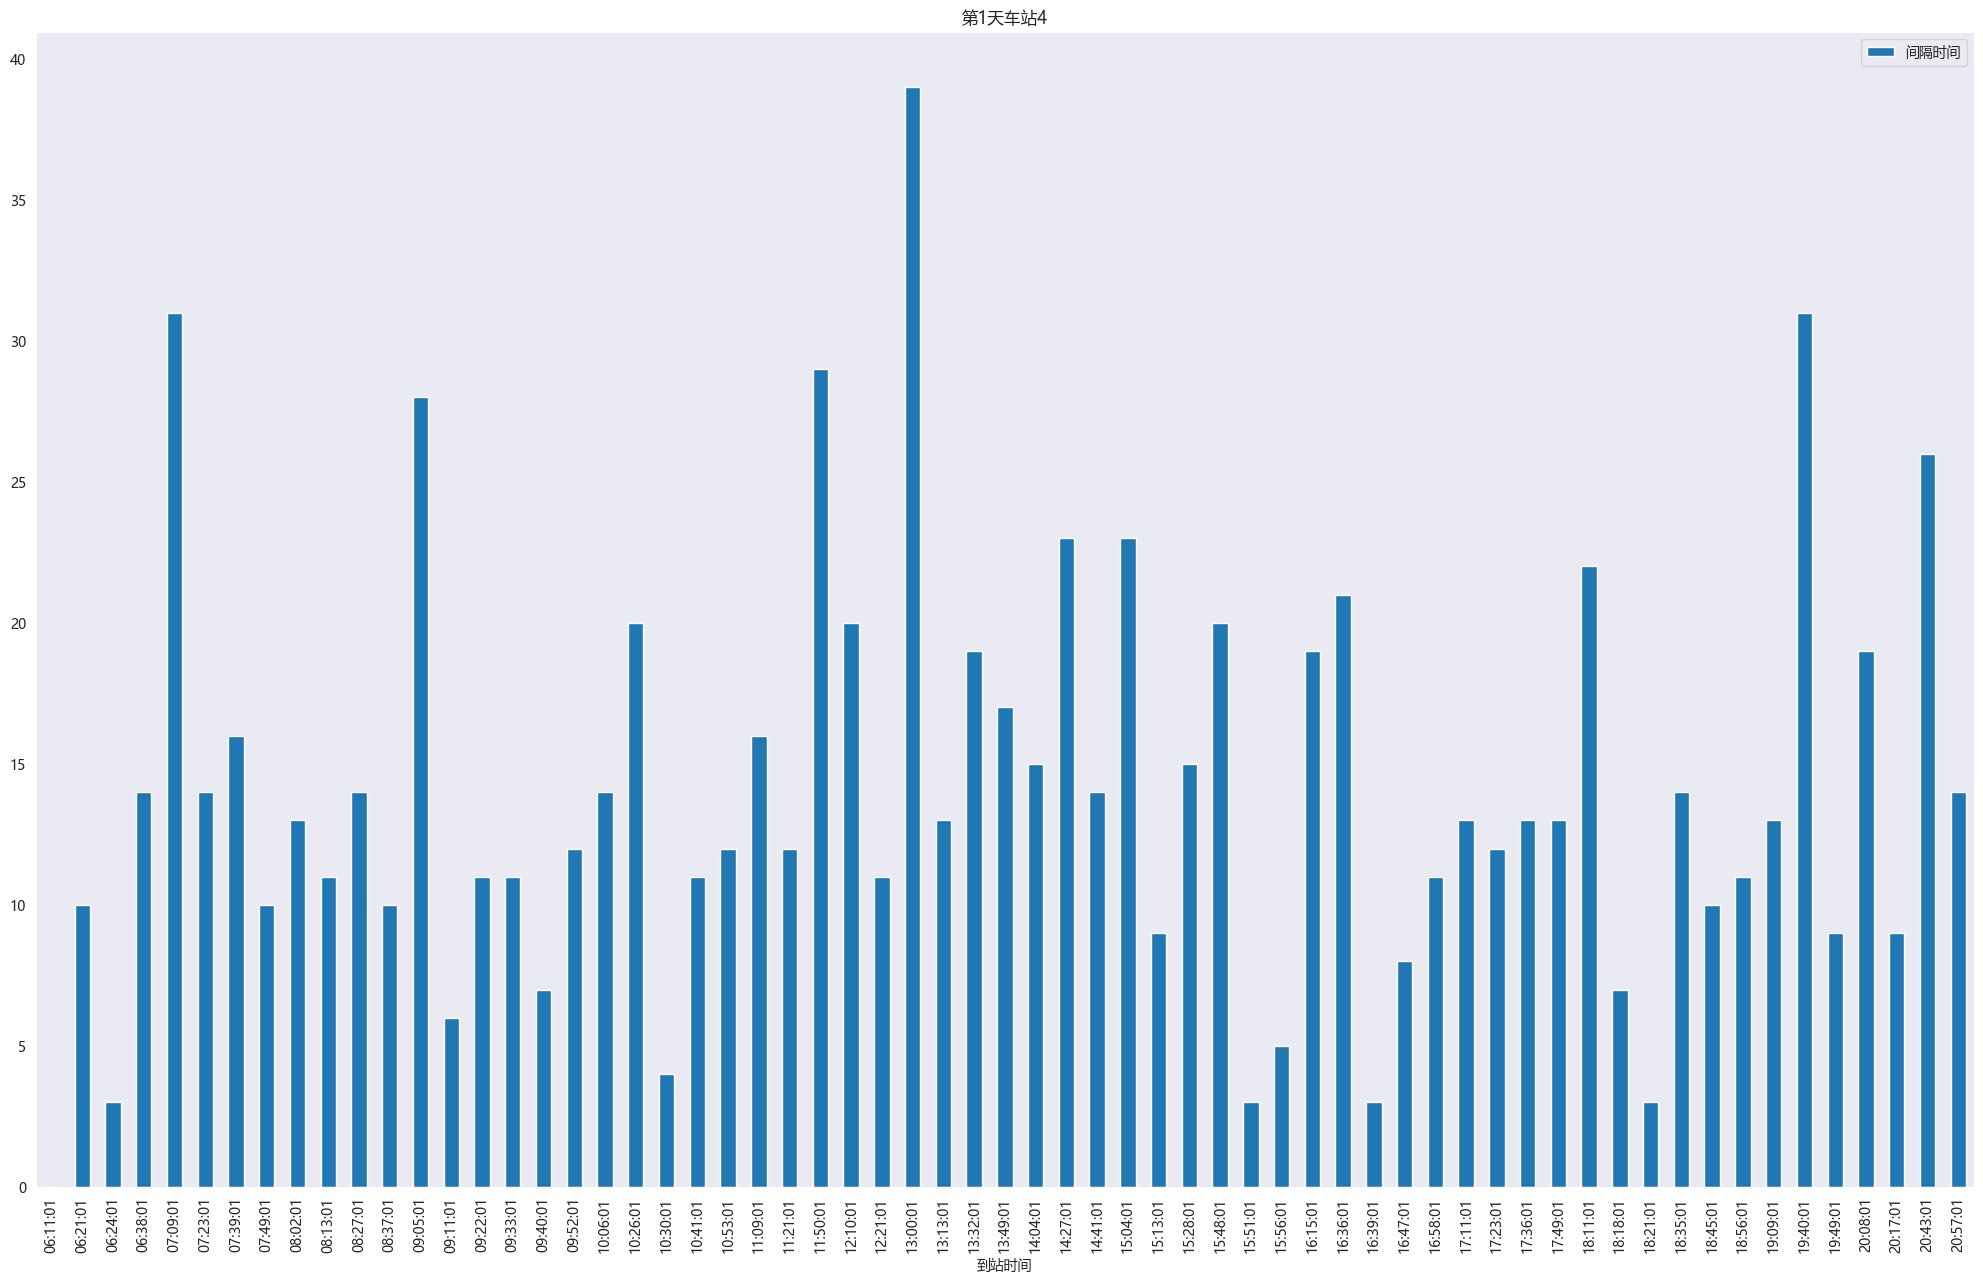

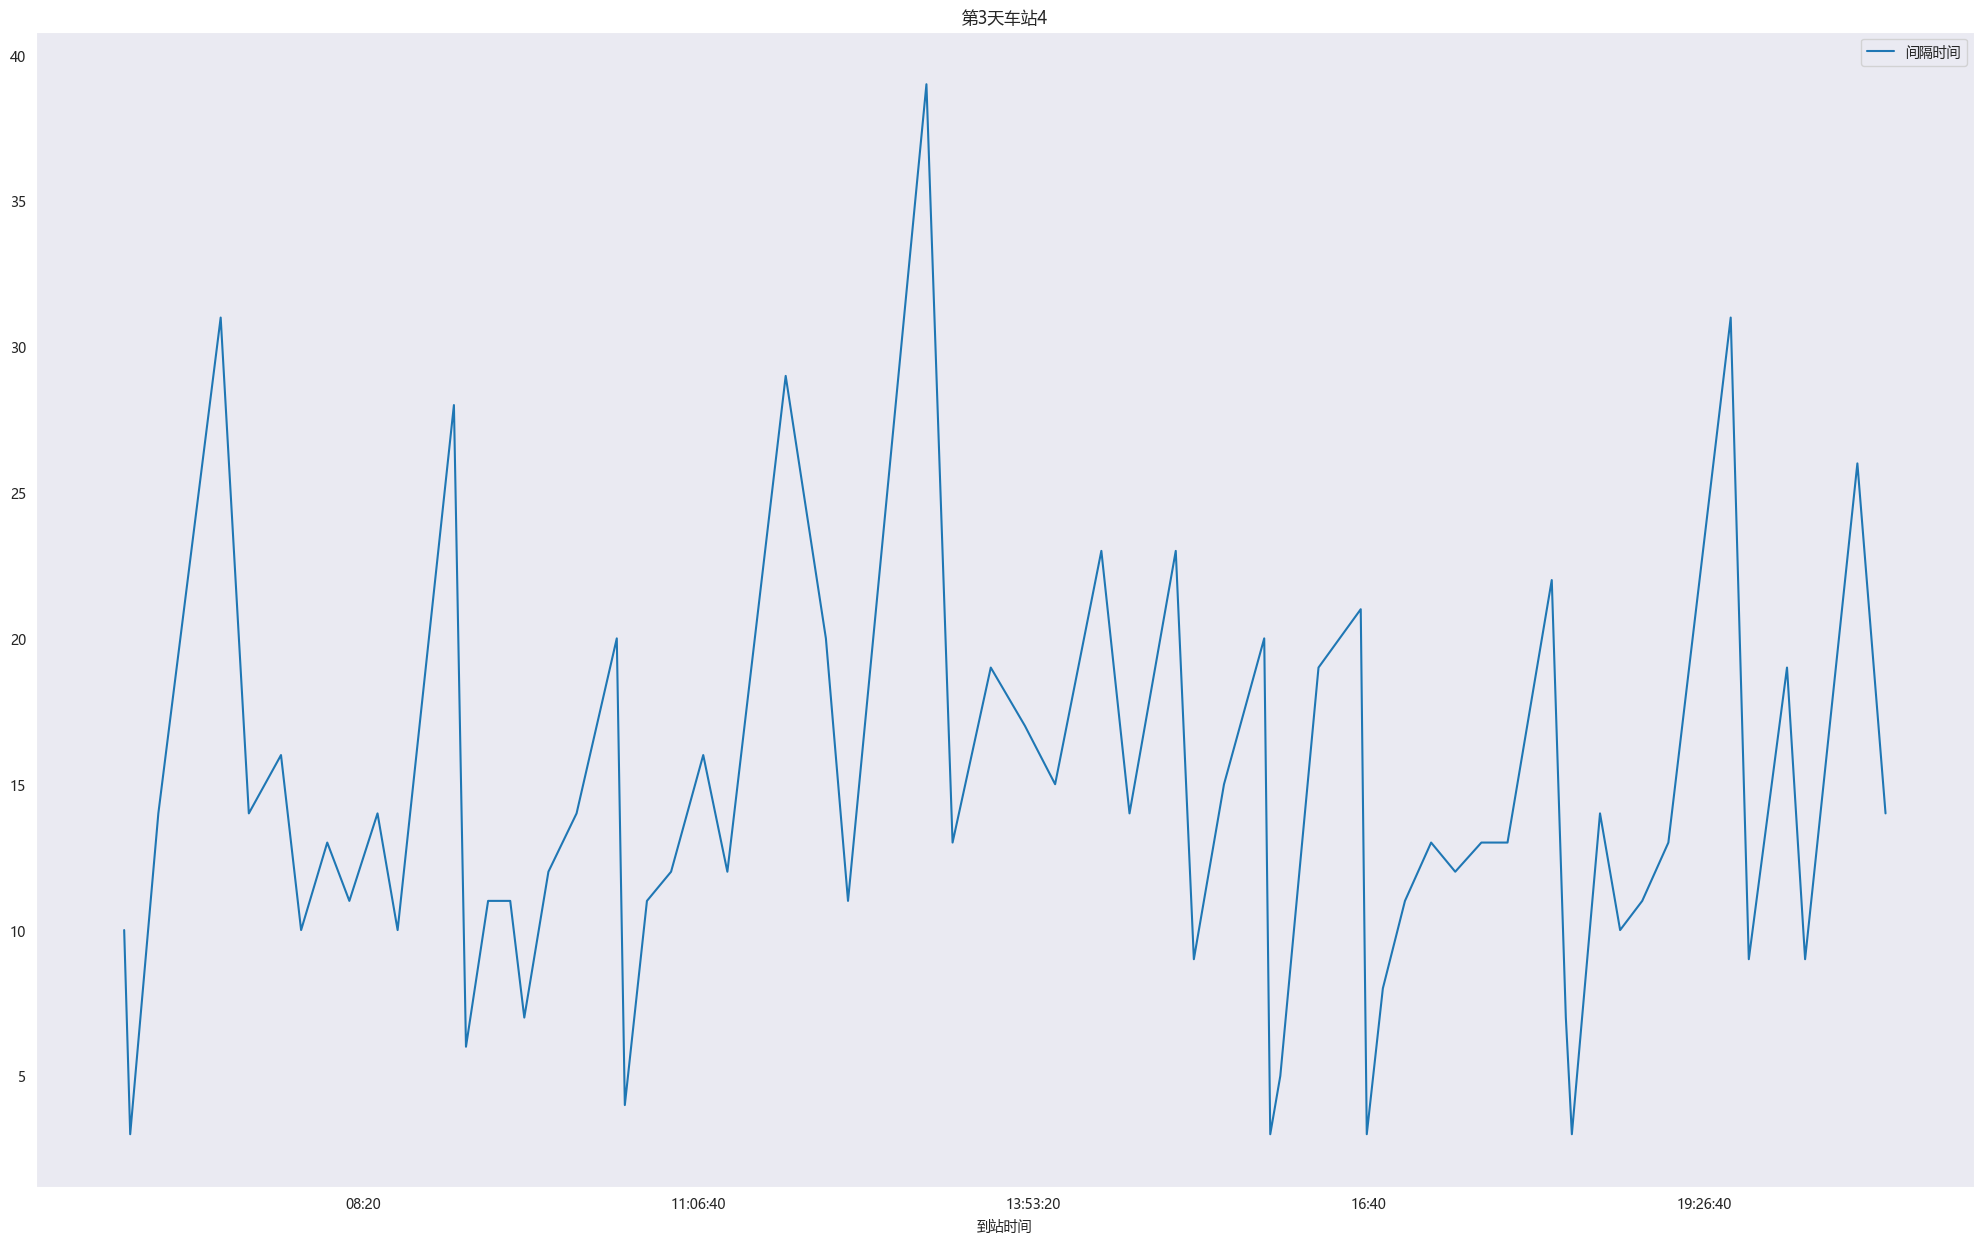

In [21]:
day_1_bar_picture = [] #到站时间-上车人数
day_1_line_picture = [] #车次-间隔时间
for i in range(1,5):
    df = chain_data_line_1[(chain_data_line_1['上车站序']== i) & (chain_data_line_1['日期编号']==3)].sort_values(by='上车时间')
    if len(df) != 0:
        # 对上车时间列做一阶差分
        df['上车时间差分'] = df['上车时间'].diff().fillna(0)
        # 设置时间间隔阈值为1分钟
        time_threshold = pd.Timedelta(minutes=2.5)                    
        # 判断是否是同一班车的乘客
        df['车次'] = (df['上车时间'].diff() > time_threshold).cumsum()
        # 根据班车编号聚合数据，计算每班车上车人数
        result = df.groupby(['车次']).agg({'上车时间': 'first', '车次': 'count'}).rename(columns={'车次': '上车人数','上车时间':'到站时间'})
        result['间隔时间'] = result['到站时间'].diff().dt.total_seconds()/60
        result['到站时间'] = result['到站时间'].dt.time
        day_1_bar_picture.append(result.plot(x='到站时间', y='间隔时间', kind='bar', figsize=(25, 15), grid=False, title=f'第1天车站{i}'))
        day_1_line_picture.append(result.plot(x='到站时间',y='间隔时间', kind='line', title=f'第3天车站{i}', figsize=(25, 15), grid=False))
